<a href="https://colab.research.google.com/github/kimdfarm/2025-1-myclass-BDA/blob/main/inclass/10w_B_wed_0507_easy_ch08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단원 08 그래프 만들기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
%config InlineBackend.figure_format = 'retina'

In [20]:
!pip install koreanize-matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.9 MB/s eta 0:00:00


In [80]:
pd.set_option('display.precision', 2)

In [85]:
import pandas as pd

url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv'
mpg = pd.read_csv(url)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [47]:
! git clone https://github.com/ai7dnn//data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.29 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [82]:
mpg = sns.load_dataset('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [83]:
mpg.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [51]:
plt.rcParams['figure.figsize'] = (4,3 )

<Axes: xlabel='horsepower', ylabel='mpg'>

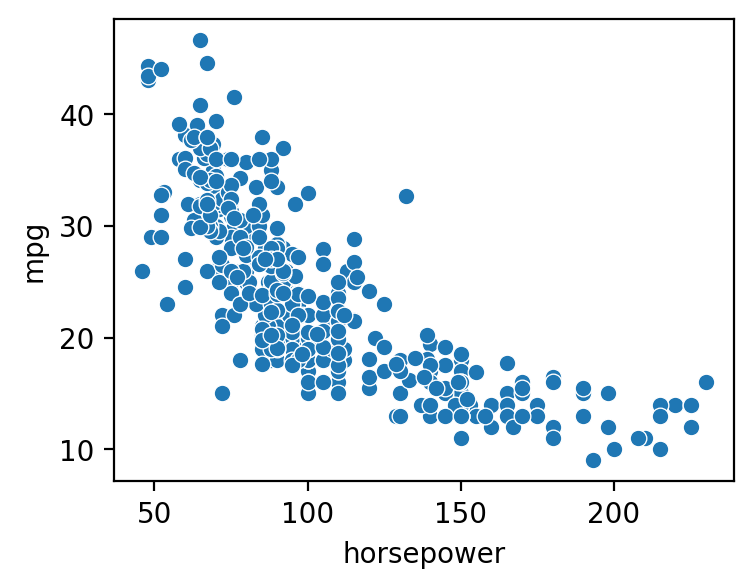

In [72]:

sns.scatterplot(data=mpg, x='horsepower', y='mpg')

<Axes: xlabel='horsepower', ylabel='mpg'>

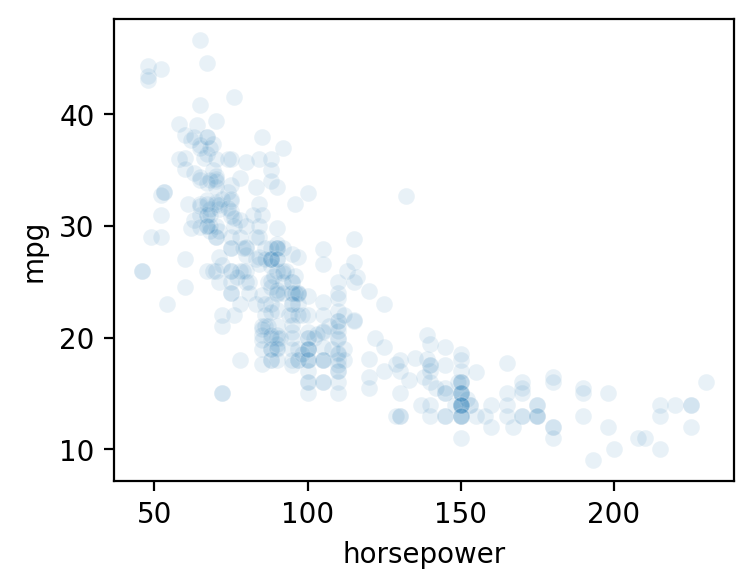

In [53]:
sns.scatterplot(data=mpg, x='horsepower', y='mpg' ,alpha =.1)

[(0.0, 250.0), (0.0, 50.0)]

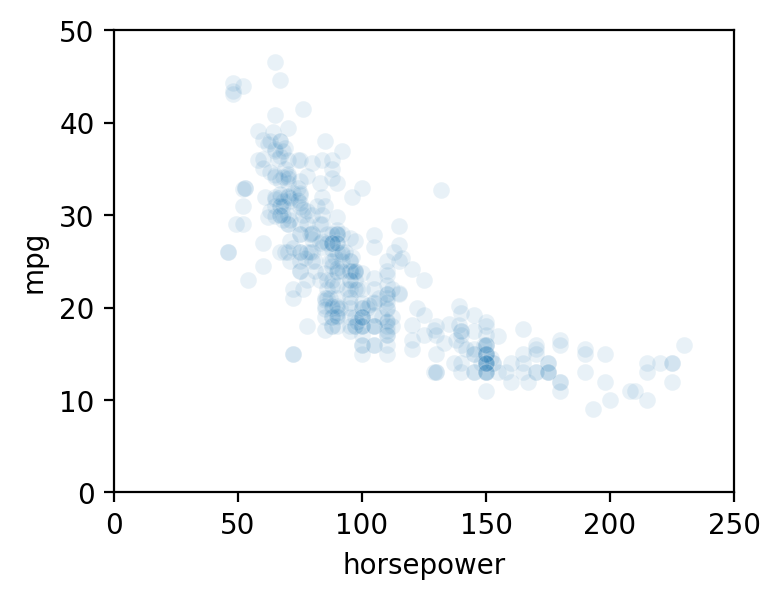

In [73]:
sns.scatterplot(data=mpg, x='horsepower', y='mpg' ,alpha =.1).set(xlim=(0,250), ylim=(0,50 ))

<Axes: xlabel='horsepower', ylabel='mpg'>

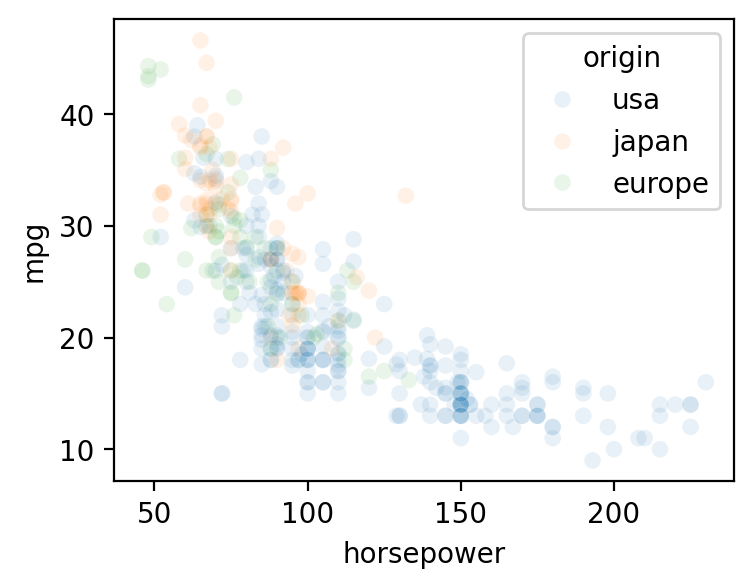

In [35]:
sns.scatterplot(data=mpg, x='horsepower', y='mpg' , hue='origin' , alpha=.1)

<Axes: xlabel='horsepower', ylabel='mpg'>

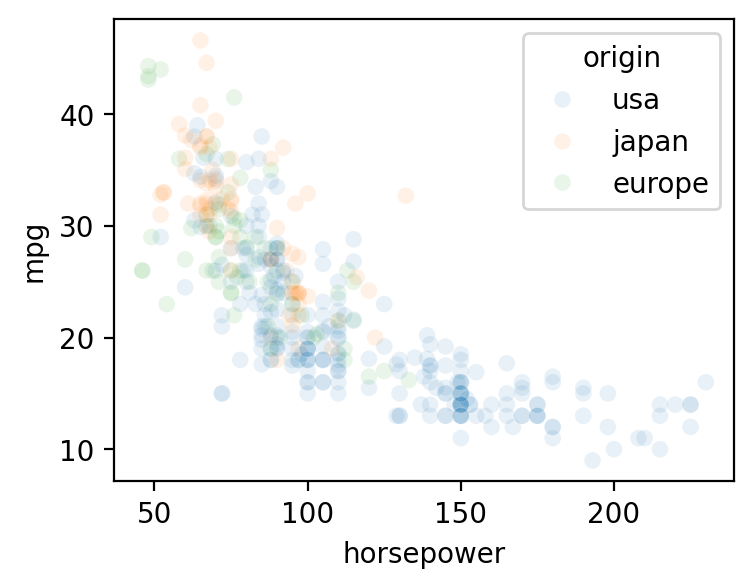

In [55]:
sns.scatterplot(data=mpg, x='horsepower', y='mpg', hue='origin', alpha=0.1)

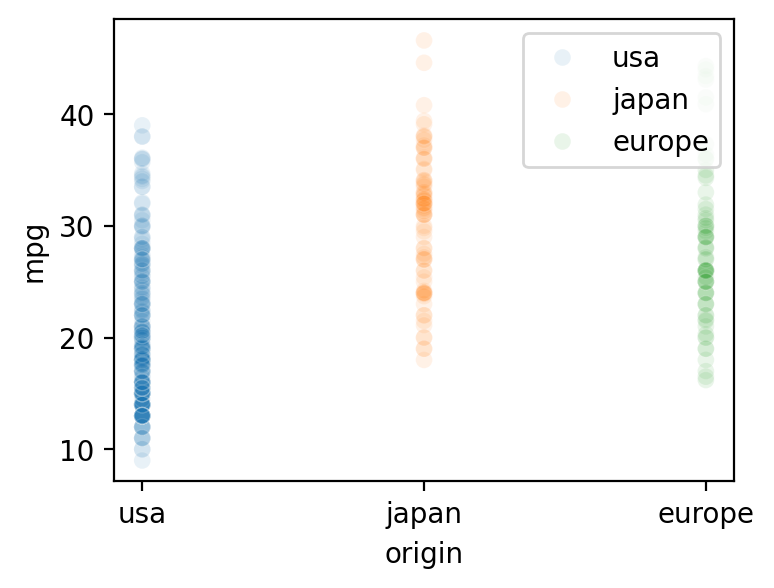

In [56]:
sns.scatterplot(data=mpg, x='origin', y='mpg', hue='origin', alpha=0.1)
plt.legend(loc='upper right')

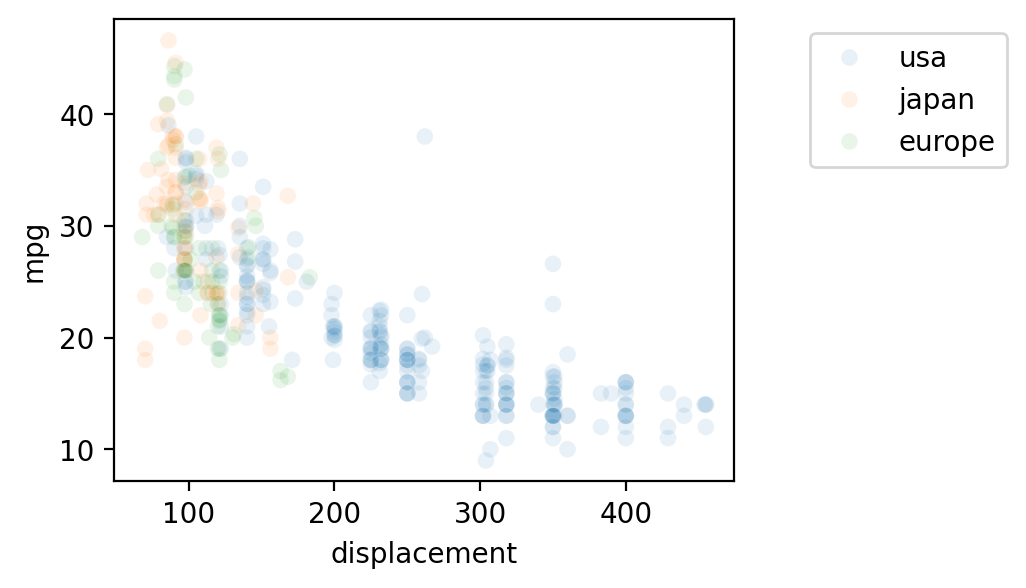

In [70]:
sns.scatterplot(data=mpg, x='displacement', y='mpg', hue='origin', alpha=0.1)
plt.legend(loc='upper left' , bbox_to_anchor=(1.1,1))

| 숫자 | 위치 설명        | 시각적 위치      |
| -- | ------------ | ----------- |
| 1  | upper right  | 오른쪽 위       |
| 2  | upper left   | 왼쪽 위        |
| 3  | lower left   | 왼쪽 아래       |
| 4  | lower right  | 오른쪽 아래      |
| 5  | right        | 오른쪽 중간 (세로) |
| 6  | center left  | 왼쪽 중간 (세로)  |
| 7  | center right | 오른쪽 중간 (세로) |
| 8  | lower center | 아래 중앙       |
| 9  | upper center | 위 중앙        |
| 10 | center       | 정중앙 (가운데)   |


<ipython-input-75-6fbd4c8322f4>:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left' , bbox_to_anchor=(1,1))


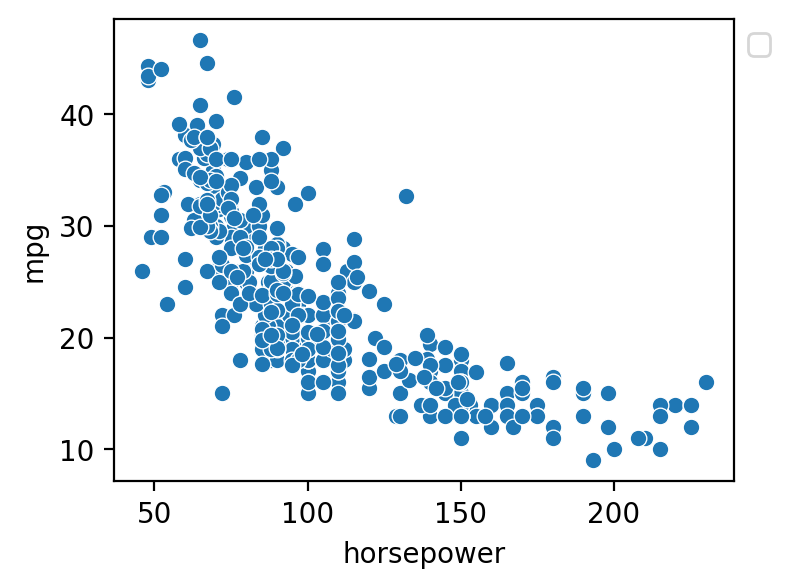

In [75]:
sns.scatterplot(data=mpg, x='horsepower', y='mpg' , hue)
plt.legend(loc='upper left' , bbox_to_anchor=(1,1))

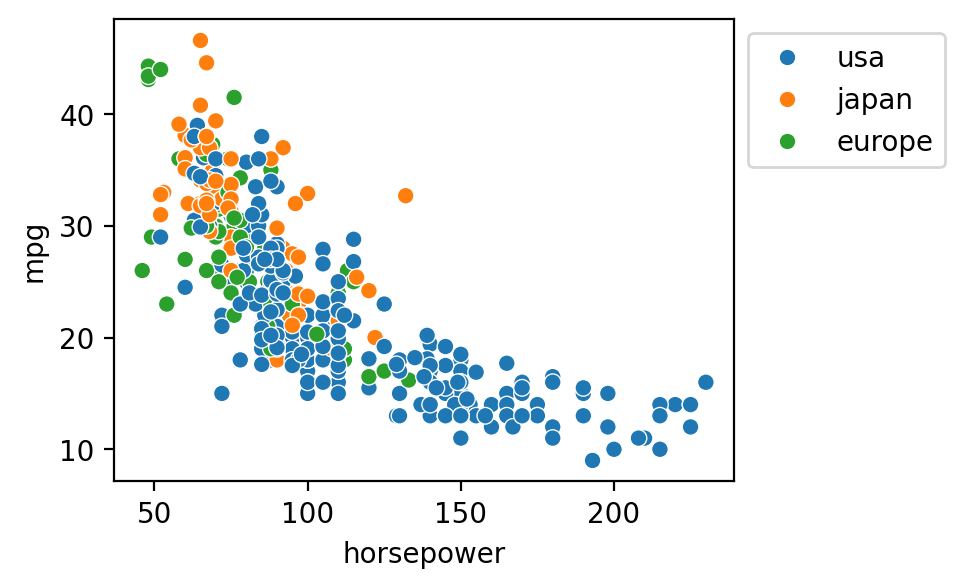

In [78]:
myPlot = sns.scatterplot(data=mpg, x='horsepower', y='mpg' , hue='origin')
myPlot.tick_params(axis='x' , label)
plt.legend(loc='upper left' , bbox_to_anchor=(1,1))

In [90]:
df_mpg = mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


<Axes: xlabel='drv', ylabel='mean_hwy'>

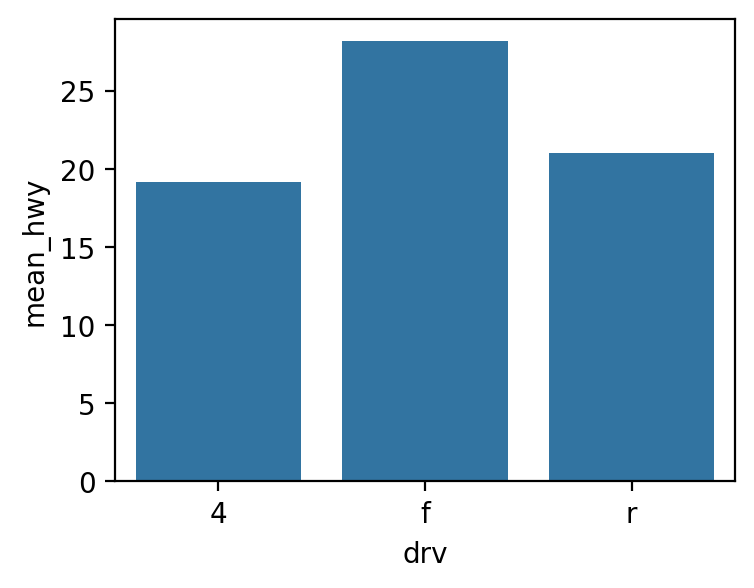

In [88]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

<Axes: xlabel='drv', ylabel='mean_hwy'>

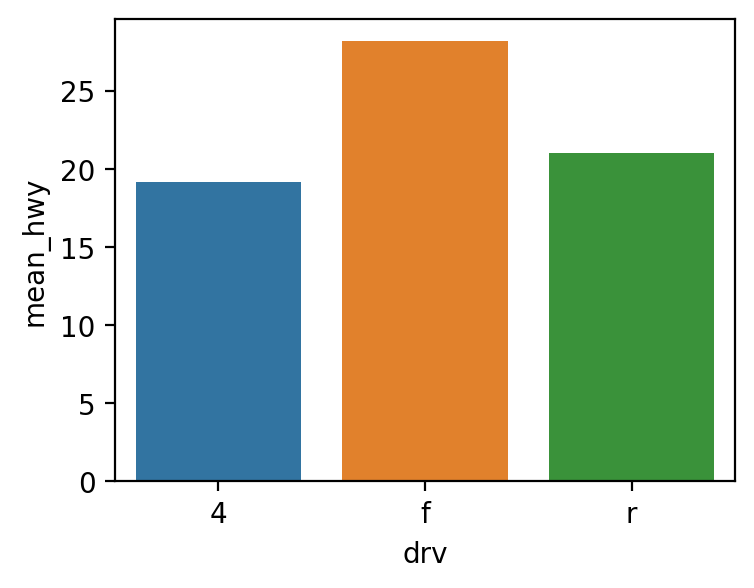

In [92]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy' , hue='drv')


<Axes: xlabel='drv', ylabel='mean_hwy'>

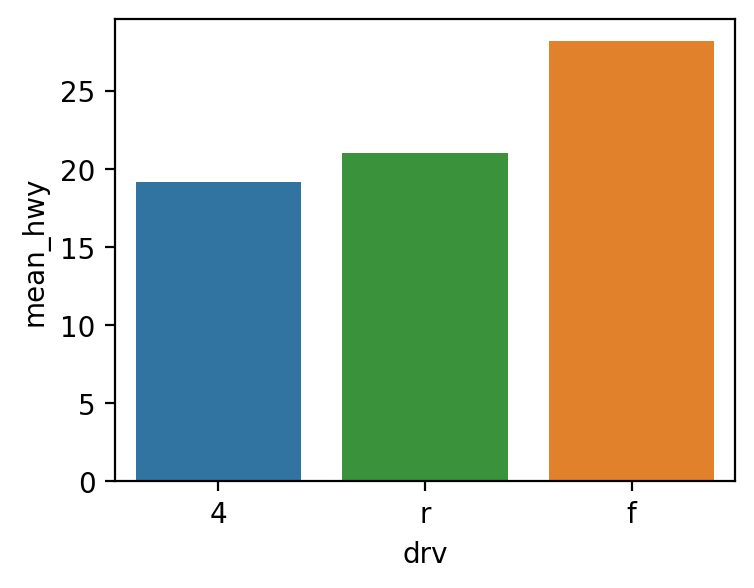

In [93]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy' , hue='drv' , order={'f' , 'r' , '4'})

<Axes: xlabel='drv', ylabel='hwy'>

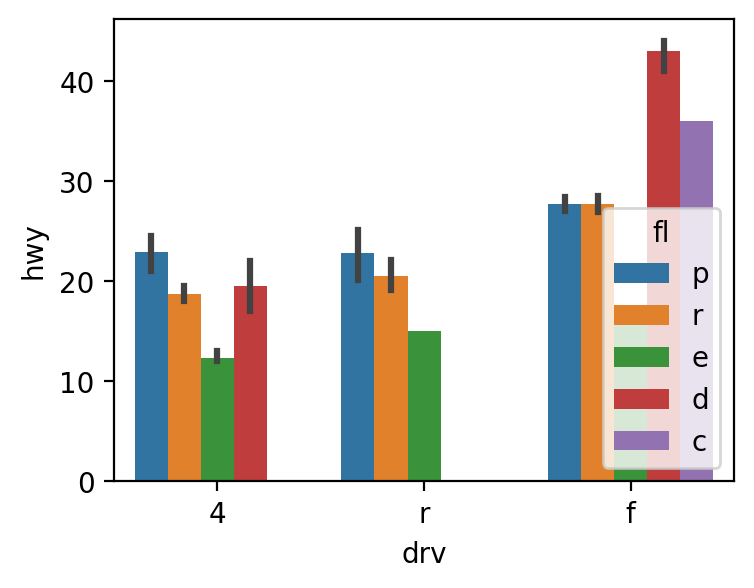

In [98]:
sns.barplot(data=mpg, x='drv', y='hwy' , hue='fl' , order={'f' , 'r' , '4'})


In [100]:
mpg.groupby('drv', as_index=False).count()[['drv','model']]

,drv,model
0,4,103
1,f,106
2,r,25


In [103]:
mpg.groupby('drv', as_index=False).count()[['drv','model']].rename(columns={'model':'count'})

,drv,count
0,4,103
1,f,106
2,r,25


In [104]:
mpg.groupby('drv', as_index=False).count()[['drv','model']].rename(columns={'model':'n'})


,drv,n
0,4,103
1,f,106
2,r,25


In [109]:
df_mpg = mpg.groupby('drv', as_index=False).agg(n = ('drv' , 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


In [110]:
df_mpg2 = mpg.groupby('drv').agg(n = ('drv' , 'count'))
df_mpg2

,n
drv,
4,103
f,106
r,25


<Axes: xlabel='drv', ylabel='n'>

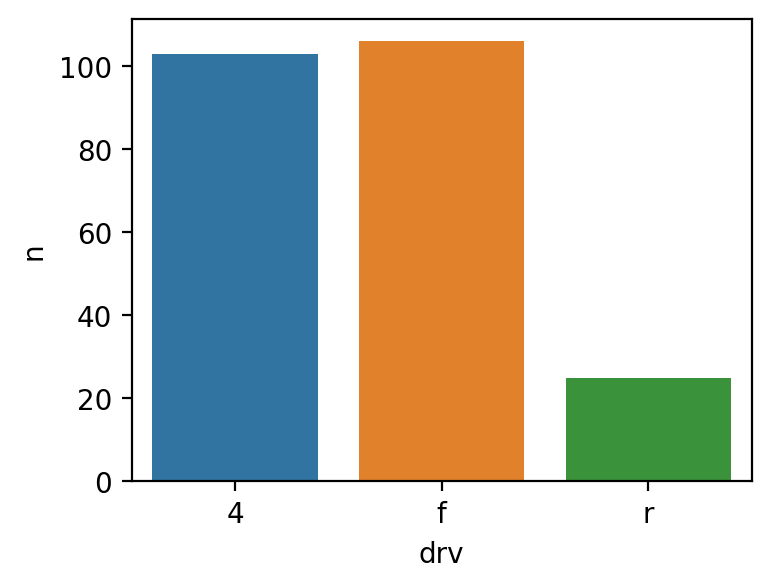

In [112]:
sns.barplot(data=df_mpg, x='drv', y='n',hue = 'drv')

<Axes: xlabel='drv', ylabel='count'>

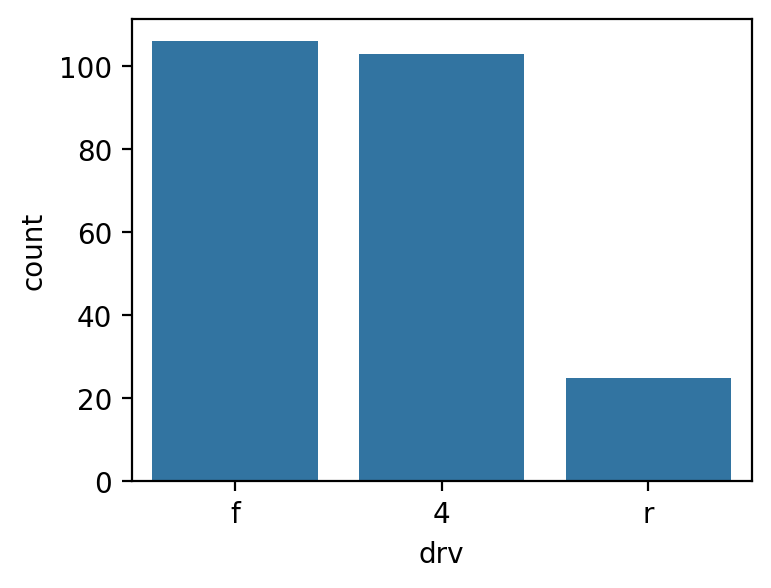

In [114]:
sns.countplot(data=mpg, x='drv')

<Axes: xlabel='drv', ylabel='count'>

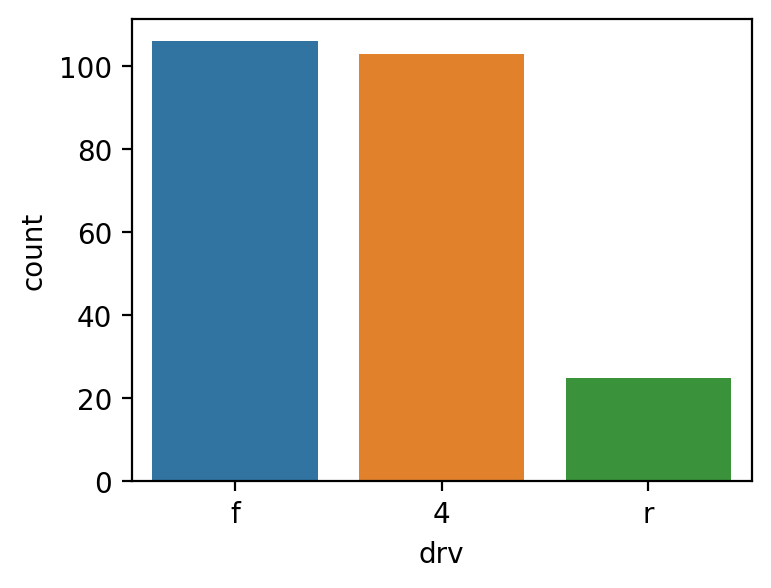

In [115]:
sns.countplot(data=mpg, x='drv',hue='drv')
